In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



In [4]:
d = pd.read_csv("tererismdataset.csv",encoding="latin1")
d.head()
d.info()
d.describe()
d.corr()
d.columns

C:\Users\rohan\AppData\Local\Temp\ipykernel_16808\2896049309.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("tererismdataset.csv",encoding="latin1")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


C:\Users\rohan\AppData\Local\Temp\ipykernel_16808\2896049309.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d.corr()


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
print("Country with the most attacks:",d['country'].value_counts().idxmax())
print("City with the most attacks:",d['city'].value_counts().index[1]) 
print("Region with the most attacks:",d['region'].value_counts().idxmax())
print("Year with the most attacks:",d['iyear'].value_counts().idxmax())
print("Month with the most attacks:",d['imonth'].value_counts().idxmax())
print("Group with the most attacks:",d['gname'].value_counts().index[1])
print("Most Attack Types:",d['weaptype1_txt'].value_counts().idxmax())


Country with the most attacks: 95
City with the most attacks: Baghdad
Region with the most attacks: 10
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Explosives


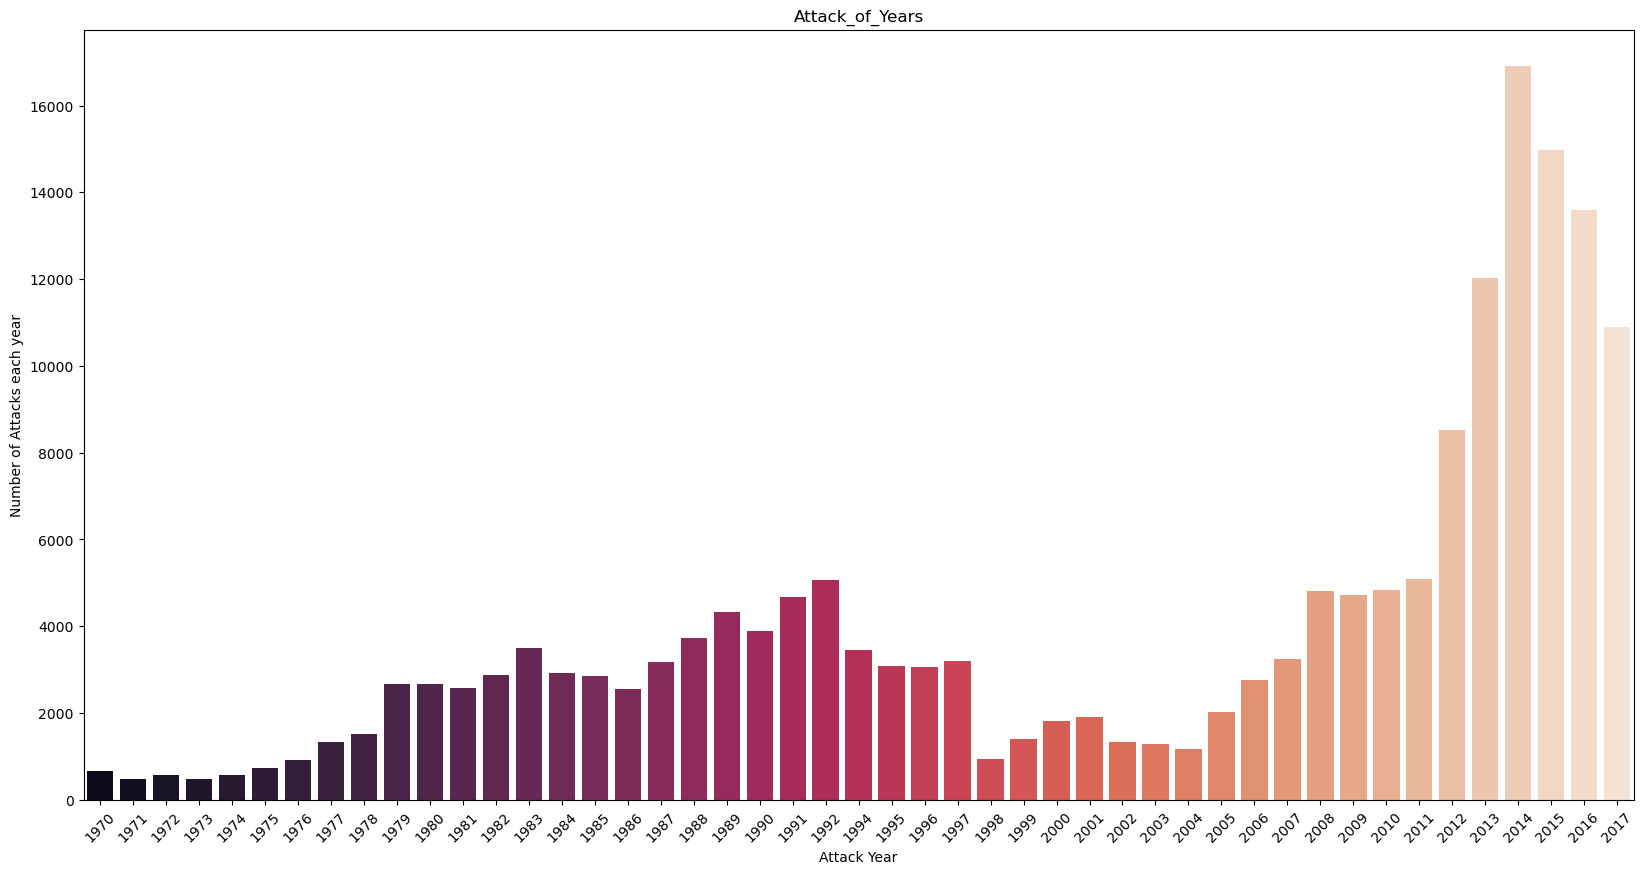

In [6]:

x_year = d['iyear'].unique()
y_count_years = d['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (20,10))
sns.barplot(x = x_year,y = y_count_years,palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

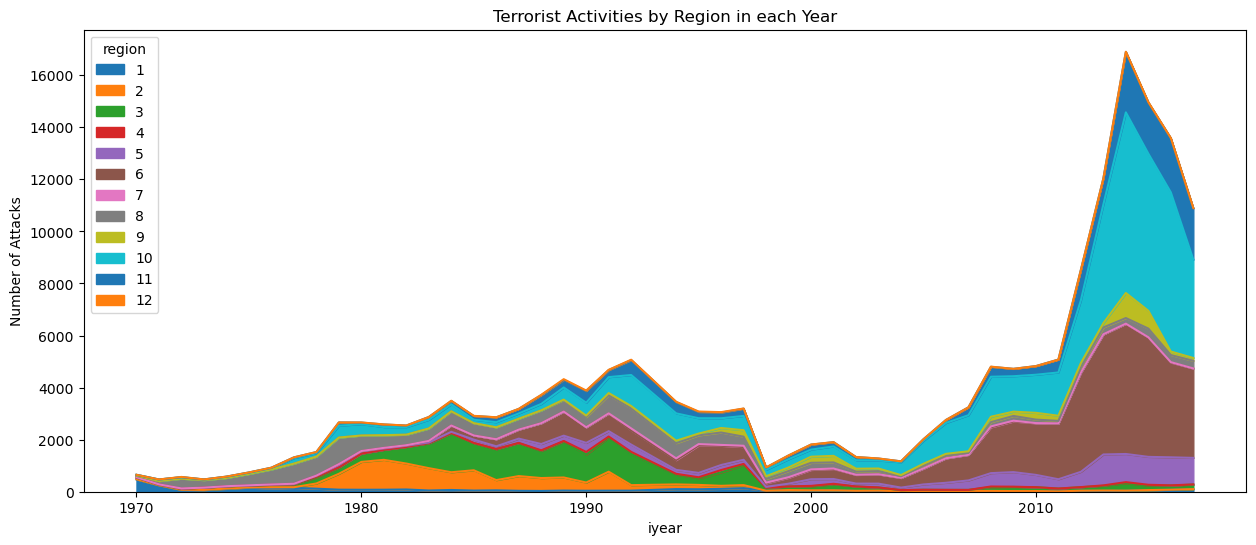

In [7]:
# ### **Terrorist Activities by Region in each Year through Area Plot**


pd.crosstab(d.iyear, d.region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()



In [8]:
d['nwound'] =d['nwound'].fillna(0).astype(int)
d['nkill'] = d['nkill'].fillna(0).astype(int)
d['casualities'] = d['nkill'] + d['nwound']


In [9]:
# Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize


terror1 = d.sort_values(by='casualities',ascending=False)[:40]


In [10]:
heat=terror1.pivot_table(index='country_txt',columns='iyear',values='casualities')
heat.fillna(0,inplace=True)

In [11]:
heat.head()

iyear,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
country_txt,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Top 4o worst terror attacks in history 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

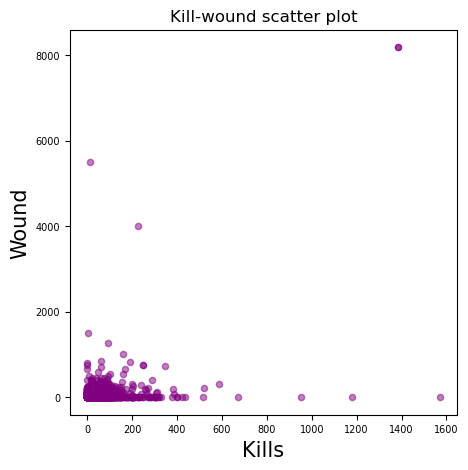

In [19]:
# ### **Death and Injuries at all time.**
d.plot(kind='scatter',x='nkill',y='nwound',alpha=0.5,color = 'purple',figsize=(5,5),fontsize=7)
plt.xlabel('Kills',fontsize=15)
plt.ylabel('Wound',fontsize=15)
plt.title('Kill-wound scatter plot')
plt.show()